# Thompson Sampling Algorithm

Step 1. At each round $n$, we consider two numbers for each ad $i$.
- $N_{i}^{1}(n)$ - the number of times the ad $i$ got reward 1 up to round $n$
- $N_{i}^{0}(n)$ - the number of times the ad $i$ got reward 0 up to round $n$

Step 2. For each ad $i$, we take a random draw from the distribution below
\begin{equation}
\Theta_{i}(n) = \beta(N_{i}^{1} + 1, N_{i}^{0}(n) + 1)
\end{equation}

Step 3. We select the ad that has the highest $\Theta_{i}(n)$

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('ggplot')

df = pd.read_csv('../datasets/Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
n_rounds = len(df)
n_ads = len(df.columns)

ads_selected = []
number_of_rewards_1 = [0] * n_ads
number_of_rewards_0 = [0] * n_ads
total_reward = 0

for i in range(n_rounds):
    selected_ad = 0
    max_random = 0
    
    for j in range(n_ads):
        # take a random draw
        random_beta = random.betavariate(number_of_rewards_1[j] + 1, number_of_rewards_0[j] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            selected_ad = j
    
    ads_selected.append(selected_ad)
    reward = df.values[i, selected_ad]
    total_reward += reward
    
    if reward == 0:
        number_of_rewards_0[selected_ad] += 1
    else:
        number_of_rewards_1[selected_ad] += 1
            
total_reward

2578

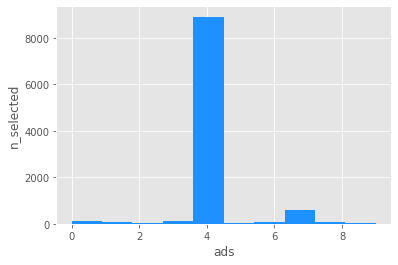

In [11]:
plt.hist(ads_selected, color='dodgerblue')
plt.xlabel('ads')
plt.ylabel('n_selected')
plt.show()